## Principal Components Analysis (PCA)

El método más usado para reducción de la dimensionalidad es **Principal Components Analysis** (PCA). La idea es de PCA es considerar que cada variable de un registro es una coordenada en una dimension. Así, un registro de 20 coordenadas sería como un punto en un espacio de 20 dimensiones. En ese espacio lo que hace este metodo es intentar extraer las direcciones de maxima varianza del conjunto de puntos. Estas direcciones son las componentes principales.

<img src = "https://qph.fs.quoracdn.net/main-qimg-1f7f2ddd852ffd092d2f06a5cc361146.webp" width = 500, align = 'center' >


Matematicamente, PCA realiza la extraccion de los autovectores de la matriz covarianza (aquella en la que cada elemento representa las covarianzas entre dos variables). Después, extrae los autovectores en orden decreciente de sus autovalores (el autovalor representa una medida de la cantidad de varianza explicada por cada autovector por si solo).


Se buscan combinaciones lineales tal que, dada la ortogonalidad de las variables en la información, se encuentra una matriz tal que, cumpla con componentes que contengan información que maximice la variabilidad de la misma. 


<img src = "https://4.bp.blogspot.com/-pleL0HvLUgU/UYqpNFdd8EI/AAAAAAAAAHA/uf11u9lcq5g/s1600/PCA_1.png" width = 700, align = 'center' >


Más información (Matemática): https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202#d3e3092

En el siguiente ejemplo utilizaremos el dataset `Iris` para obtener una nueva representación de los datos es un espacio de menor dimenasión del original.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

El dataset contiene datos sobre tres plantas de iris (iris setosa, iris versicolour, e iris virginica), descritas mediante cuatro atributos:

1. Longitud del sépalo (cm)
2. Ancho del sépalo (cm)
3. Longitud del pétalo (cm)
4. Ancho del pétalos (cm)

In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# Asignamos los datos y las etiquetas a variables diferentes.

features = iris.data
label = iris.target
print (features.shape)

(150, 4)


Primero vamos a explorar graficamente los datos. Para ello tomamos los dos primeros atributos.

([], <a list of 0 Text yticklabel objects>)

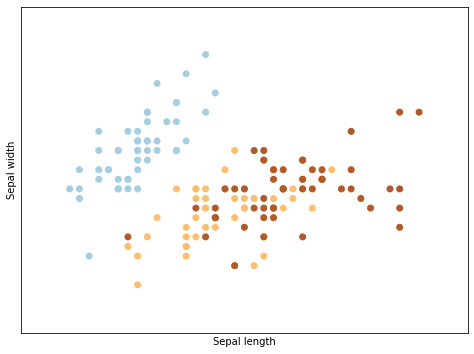

In [10]:
feat_2dim = features[:,:2]


plt.figure(2, figsize=(8, 6))
plt.clf() ## Clear
plt.scatter(feat_2dim[:, 0], feat_2dim[:, 1], c=label, cmap=plt.cm.Paired) # El parámetro c=label sirve para indicar que el color
plt.xlabel('Sepal length')                                                 # vendrá dado en función del grupo al que pertenezca
plt.ylabel('Sepal width')
plt.xlim(feat_2dim[:, 0].min() - .5, feat_2dim[:, 0].max() + .5)
plt.ylim(feat_2dim[:, 1].min() - .5, feat_2dim[:, 1].max() + .5)
plt.xticks(())
plt.yticks(())

## PCA en Scikit-learn

El módulo `PCA` del paquete de `sklearn.decomposition` de Scikit-learn contiene los métodos necesarios para obtener los componentes principales de un conjunto de datos y transformarlos al nuevo espacio de representación.

Utilizando el datset anterior vamos extraer las tres componentes principales y luego transformar el dataset al nuevo espacio de respresentación de los atributos. Para ello usamos:

```python

class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

```

In [17]:
from sklearn.decomposition import PCA

# Transformamos los datos usando los tres componentes principales

pca3 = PCA(n_components=3)
features_reduced_3 = pca3.fit_transform(features)

print (features_reduced_3.shape)

(150, 3)


In [20]:
features_reduced_3

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [22]:
pca3.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

El atributo `n_components` indica el número de componentes principales que queremos utilizar para reducir la dimensionalidad del dataset. A continuación generamos una gráfica con los datos transformados.

Text(0.5, 0, '3rd eigenvector')

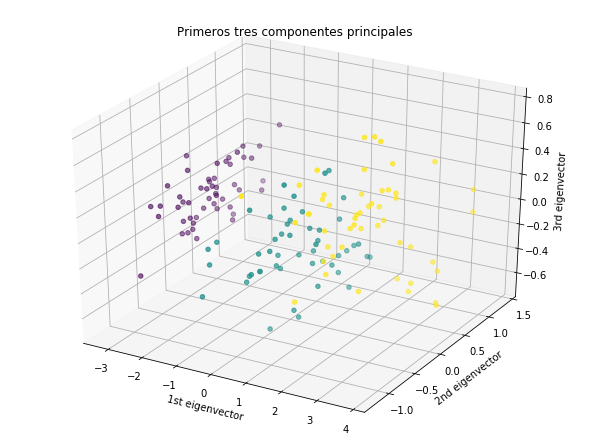

In [23]:
# Hacemos una gráfica del datset reducido

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(features_reduced_3[:, 0], features_reduced_3[:, 1], features_reduced_3[:, 2], c=label)
ax.set_title("Primeros tres componentes principales")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

Para reducir a dos dimensiones simplemente tenemos que modificar el atributo `n_components = 2`

In [23]:
# El proceso se puede descomponer en tres etapas 
# 1. Crear el objeto PCA
# 2. Extraemos los componentes principales 
# 3. Transformamos los datos 

pca2 = PCA(n_components=2)
pca2.fit(features)
features_reduced_2 = pca2.transform(features)

print (features_reduced_2.shape)

(150, 2)


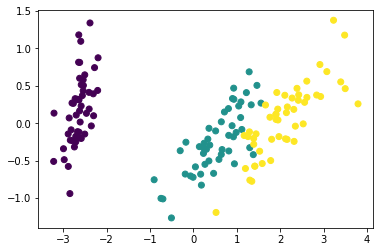

In [24]:
import matplotlib.pyplot as plt
plt.scatter(features_reduced_2[:, 0], features_reduced_2[:, 1], c=label)

## ¿Cómo elegir el número de componentes principales?

Para elegir k, hay que tener en cuenta dos conceptos:

- **Error de proyección medio cuadrático**, es decir, la diferencia entre los datos originales  y los datos reconstruidos a partir del nuevo espacio de características.

\begin{equation}
\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}
\end{equation}

- **Variación total de los datos,** se considera un buen número k, al mínimo valor que hace que se cumpla:

\begin{equation}
\frac{\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}}{\frac{1}{m}\sum_{i=1}^{m}
{\mid{x^{(i)}\mid}^2}} \leq 0.01
\end{equation}
Dicho de otra forma, el se considera un buen número de componentes principales al valor más pequeño de k que  hace que el 99% de la varianza se retenga.

En Scikit-learn podemos obtener el pocentaje de varianza explicada por cada componente principal con el atributo:

```python
PCA.explained_variance_ratio_
```

Vamos a tomar un PCA con todos los componentes posibles, es decir, tantos como variables tenga el dataset inicial

In [25]:
pca = PCA()
pca.fit(features)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

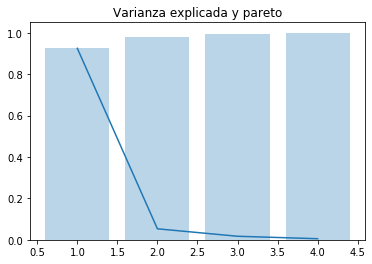

In [13]:
plt.plot(range(1,5),pca.explained_variance_ratio_)
plt.bar(range(1,5),np.cumsum(pca.explained_variance_ratio_), alpha=.3)
plt.title("Varianza explicada y pareto")
plt.show()

In [29]:
print ('Porcentaje de varianza explicada (2 componentes): ', np.cumsum(pca.explained_variance_ratio_)[1]*100)
print ('Porcentaje de varianza explicada (3 componentes): ', np.cumsum(pca.explained_variance_ratio_)[2]*100)

Porcentaje de varianza explicada (2 componentes):  97.7685206318795
Porcentaje de varianza explicada (3 componentes):  99.47878161267248


En este caso se podría elegir cualquier número de componentes que claramente explicara buena parte de la varianza de los datos. Con la primera variable ya se explica el 97.7 % 

# Ejercicio

Carga los datos de `diabetes` del paquete `sklearn.datasets`, extrae **n** componentes principales y representa los datos transformados en un grafica. Reporta el porcentaje de varianza obtenido.

Información del dataset:

El dataset contiene datos sobre la evolución de la enfermedad en una muestra de pacientes. Cada registro contiene diez variables fisiológicas (edad, sexo, peso, presión arterial) y la progresión de la enfermedad después de un año.

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA